In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_diabetes    # built-in data
from sklearn.model_selection import train_test_split    # train, test 데이터 분할
from sklearn.linear_model import LinearRegression, SGDRegressor # 선형 회귀 분석
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
diabetes = load_diabetes()
data = diabetes['data']
target = diabetes['target']
descr = diabetes['DESCR']

# print(data)
# print(target)
print(descr)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# 데이터셋 가져오기
X, y = load_diabetes(return_X_y=True)
print(type(X), type(y))
print(X.shape, y.shape)
print(X)
print(y)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 1

In [4]:
# 데이터 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10) # 10개의 변수

# 모델 생성
m = LinearRegression()

# 모델 학습
m.fit(X_train, y_train) # 모수 추정

#print(m.coef_) # 추정된 모수 확인
#print(m.intercept_)  # 추정된 상수항 확인
# target = 6.924784*age -224.39685223*sex + 505.739358978*bmi + ... + 151.798318

# 모델 검증
train_score = m.score(X_train, y_train) # 모형 성능 평가
train_r2 = r2_score(y_train, m.predict(X_train))
print(train_score)
print(train_r2)

# 모델 검증
test_score = m.score(X_test, y_test)
# coefficient of Determination r^2
test_r2 = r2_score(y_test, m.predict(X_test))

print(test_score)
print(test_r2)

# y_predict = m.predict(X_test)
# print(r2_score(y_test, y_predict))

0.575174636427732
0.575174636427732
0.4167503674460423
0.4167503674460423


In [5]:
# Pearson's correlation coefficient (다른 방식)
r, p = stats.pearsonr(y_test.flatten(), m.predict(X_test).flatten())

print(f"Pearson correlation coefficient is {r}")
print(f'r^2 is {r**2}')

Pearson correlation coefficient is 0.6573467775290236
r^2 is 0.43210478592779167


950.4956137180633 152.91978688616442
950.4956137180632 152.91978688616442


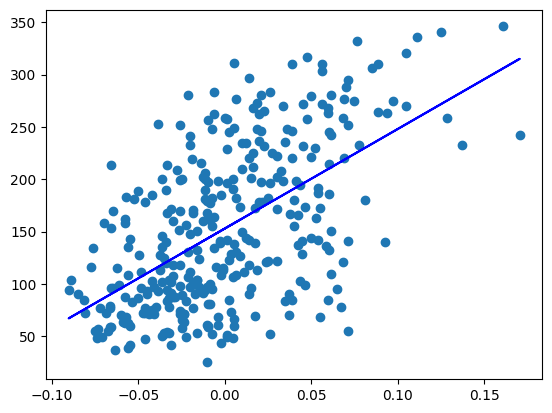

In [6]:
x_bmi = X[:,2]               # bmi column only
X_bmi = x_bmi[:, np.newaxis] # into two-dim

X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, random_state=10)

m = LinearRegression().fit(X_train, y_train)
print(m.coef_[0], m.intercept_)   # slope, intercept


# Using Formula
x_mean = np.mean(X_train[:, 0])
y_mean = np.mean(y_train)
x_std = np.std(X_train[:, 0])
y_std = np.std(y_train)
xy_corr = np.corrcoef(X_train[:, 0], y_train)[0,1]

my_slope = xy_corr * (y_std / x_std)
my_intercept = y_mean - (my_slope * x_mean)
print(my_slope, my_intercept)

_, axe = plt.subplots()
axe.scatter(X_train[:,0], y_train)

# axe.plot(X_train[:,0], X_train[:,0]*m.coef_+m.intercept_, c='r')
# axe.plot(X_train[:,0], X_train[:,0]*my_slope+my_intercept, c='r')
axe.plot(X_train[:,0], m.predict(X_train), c='b')

In [7]:
def my_line(x, coef=1.0, intercept=1.0) :
  return x*coef+intercept

def err(y, y_pred) :
  return y - y_pred

def sqerr(y, y_pred) :
  return ((y-y_pred)**2).sum()


# rsq의 결과값이 작을수록 예측 모델이 더 좋음을 나타냄 (평균값 대비 모델이 좋은지 판단하는 척도)
def rsq(y, y_pred) :
  return 1 - (sqerr(y, y_pred) / sqerr(y, y.mean()))

In [8]:
target_pred = my_line(X_train[:,0], m.coef_, m.intercept_)
# square error : 회귀선을 기준으로 err 값을의 제곱의 합을 나타냄(음수의 경우 상쇄되기 때문에 제곱의 합으로 구함)
sqerr(y_train, target_pred)

# 평균값보다 예측 모델(여러 값들을 통해 얻은 결과값)이 더 좋은지 판단하는 척도 (rsq, score)
print(rsq(y_train, target_pred))
print(m.score(X_train, y_train))

0.3322712894001999
0.3322712894001999


In [9]:
# 회귀선을 긋는 또다른 방법 : SGDRegressor()

# 데이터 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10) # 10개의 변수

# 모델 생성
m = SGDRegressor(max_iter=100000)

# 모델 학습
m.fit(X_train, y_train) # 모수 추정

print(m.coef_) # 추정된 모수 확인
print(m.intercept_)  # 추정된 상수항 확인
# target = 6.924784*age -224.39685223*sex + 505.739358978*bmi + ... + 151.798318

# 모델 검증
train_score = m.score(X_train, y_train) # 모형 성능 평가
train_r2 = r2_score(y_train, m.predict(X_train))
print(train_score)
print(train_r2)

# 모델 검증
test_score = m.score(X_test, y_test)
# coefficient of Determination r^2
test_r2 = r2_score(y_test, m.predict(X_test))

print(test_score)
print(test_r2)

# ConvergenceWarning
# 수렴이 정상적으로 되지 않는 경우 나타나는 문구
# 반복횟수가 부족함! max_iter를 조정해서 해결 가능

[   2.48704791 -284.53384325  534.73865221  279.5278294   -81.68670017
 -112.27137313 -218.41811263  172.21545442  315.58814984  196.93920413]
[150.09212405]
0.5595938793963277
0.5595938793963277
0.449189727127125
0.449189727127125


[781.57830021] [152.93469111]
950.4956137180632 152.91978688616442
0.3217772427679204
0.3217772427679204
0.3217772427679204
0.3322712894001999


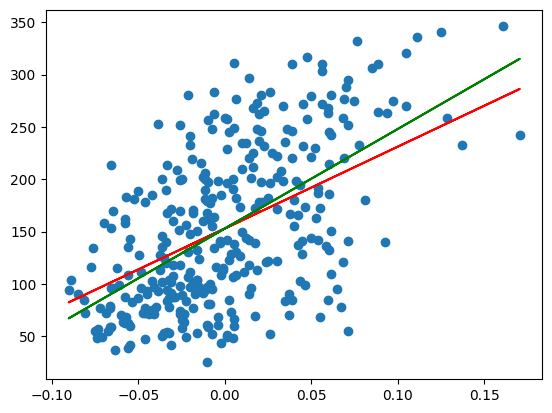

In [10]:
x_bmi = X[:,2]               # bmi column only
X_bmi = x_bmi[:, np.newaxis] # into two-dim

X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, random_state=10)

m = SGDRegressor(max_iter=100000).fit(X_train, y_train)
print(m.coef_, m.intercept_)   # slope, intercept


# Using Formula
x_mean = np.mean(X_train[:, 0])
y_mean = np.mean(y_train)
x_std = np.std(X_train[:, 0])
y_std = np.std(y_train)
xy_corr = np.corrcoef(X_train[:, 0], y_train)[0,1]

my_slope = xy_corr * (y_std / x_std)
my_intercept = y_mean - (my_slope * x_mean)
print(my_slope, my_intercept)

_, axe = plt.subplots()
axe.scatter(X_train[:,0], y_train)

axe.plot(X_train[:,0], X_train[:,0]*m.coef_+m.intercept_, c='r')
axe.plot(X_train[:,0], X_train[:,0]*my_slope+my_intercept, c='g')


# rsq : 예측 모델 척도 판단
target_pred = my_line(X_train[:,0], m.coef_, m.intercept_)
# square error : 회귀선을 기준으로 err 값을의 제곱의 합을 나타냄(음수의 경우 상쇄되기 때문에 제곱의 합으로 구함)
sqerr(y_train, target_pred)

# 평균값보다 예측 모델(여러 값들을 통해 얻은 결과값)이 더 좋은지 판단하는 척도 (rsq, score)
# by SGDRegressor
print(rsq(y_train, target_pred))
print(rsq(y_train, m.predict(X_train)))
print(m.score(X_train, y_train))
# by linear regression 
print(rsq(y_train, X_train[:,0]*my_slope+my_intercept))

# 결론 : SGDRegressor 보다 LinearRegression이 조금 더 좋은 예측모델이다!

In [11]:
# forward 방식 (일반적인 방식)
def brute(x, y, a = 1.0, b = 1.0) :
    y_hat = x*a + b
    while (y - y_hat > 1).any() :
        # print(a,b)    # a, b가 처리되는 과정 확인
        a = a + x
        b = b + 1
        y_hat = x*a + b
    return a, b

10.192734771283801 150.0


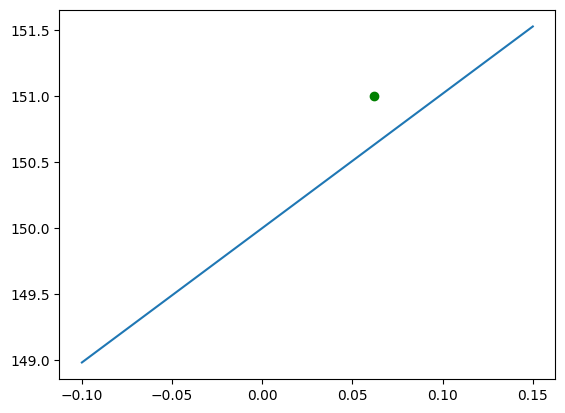

In [12]:
# SGDRegressor가 어떻게 기울기, 절편을 구해내는지 확인
# 라인을 기울기 1, 절편 1 등 초기값으로 잡아두고 원하는 에러 범위 내에 포함될 때까지 연산 실행

_, axe = plt.subplots()
xs = np.linspace(-0.1, 0.15, 10)
bmi = X[:, 2]
target = y

axe.scatter(bmi[0], target[0], c='g')
# axe.plot(xs, my_line(xs, coef=1.0, intercept=1.0))

a1, b1 = brute(bmi[0], target[0])
print(a1, b1)
axe.plot(xs, my_line(xs, coef=a1, intercept=b1))

In [13]:
# back propagation(역전파)
# 에러값을 활용해 기울기와 절편을 구함
def back_prop(x, y, a=1.0, b=1.0) :
  y_hat = x*a + b
  err = y - y_hat
  a = a + x*err
  b = b + 1*err
  return a, b

10.192734771283801 150.0
10.250624555903698 150.9383037934813


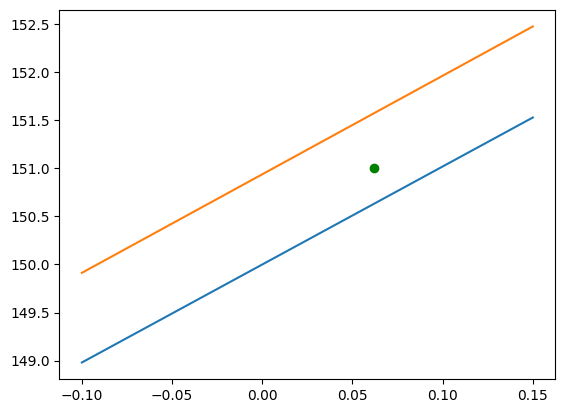

In [14]:
print(a1, b1)

a2, b2 = back_prop(bmi[0], target[0])
print(a2,b2)

_, axe = plt.subplots()
xs = np.linspace(-0.1, 0.15, 10)
bmi = X[:, 2]
target = y


axe.scatter(bmi[0], target[0], c='g')

axe.plot(xs, my_line(xs, coef=a1, intercept=b1))
axe.plot(xs, my_line(xs, coef=a2, intercept=b2))

In [15]:
a = 1.0
b = 1.0

for bmi_i, target_i in zip(bmi, target) :
  a, b = back_prop(bmi_i, target_i, a, b)

print(a, b)

587.8654539985616 99.4093556453094


587.8654539985616 99.4093556453094


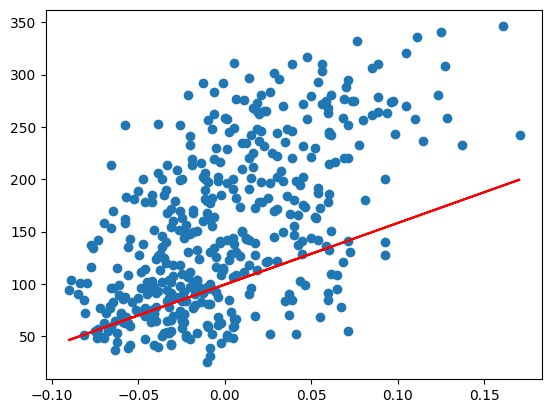

In [16]:
# iteration 1회 실행 시 나타나는 plot 확인 - 에포크(epoch)
# 에포크란 전체 과정에서 하나의 훈련 자료점으로 반복 주기를 나타냄

a = 1.0
b = 1.0

for i in range(bmi.shape[0]) :
  a, b = back_prop(bmi[i], target[i], a, b)

print(a, b)

_, axe = plt.subplots()

axe.scatter(bmi, target)

axe.plot(bmi, bmi*a+b, color='r')

913.5973364346786 123.39414383177173


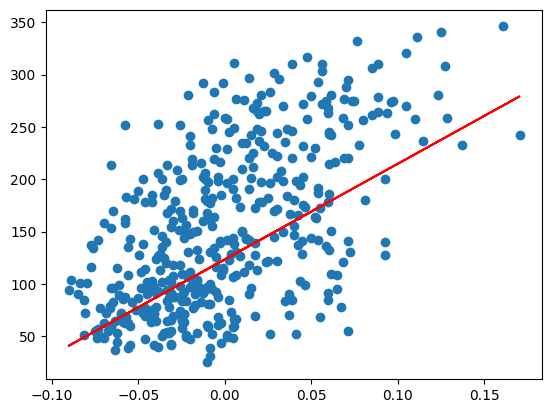

In [17]:
# iteration을 50회 실시 (= 에포크 50회)하여 결과값 확인
# 위 그래프보다 나은 결과값을 확인 할 수 있다!
# 적정 에포크 횟수는 데이터마다 모두 다르다! (메타 파라미터로 조정 가능)

a = 1.0
b = 1.0

for e in range(50) :
  for i in range(bmi.shape[0]) :
    a, b = back_prop(bmi[i], target[i], a, b)

print(a, b)

_, axe = plt.subplots()

axe.scatter(bmi, target)

axe.plot(bmi, bmi*a+b, color='r')

587.8654539985616 99.4093556453094


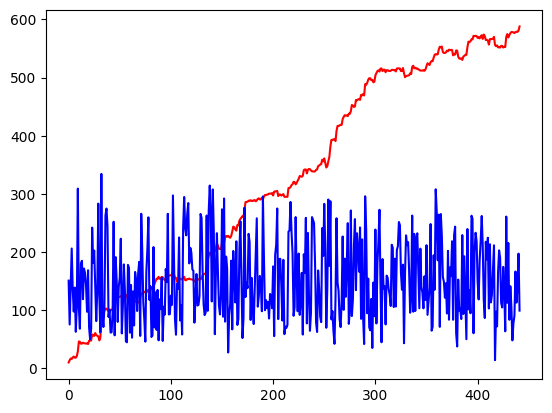

In [18]:
# 1회 에포크 실행 시 절편, 기울기 변화를 숫자로 확인 => hist_a, hist_b
# 기울기와 절편이 어떤 형태로 변경되어 가는지 확인

a = 1.0
b = 1.0
hist_a = []
hist_b = []

for i in range(bmi.shape[0]) :
  a, b = back_prop(bmi[i], target[i], a, b)
  hist_a.append(a)
  hist_b.append(b)
print(a, b)

_, axe = plt.subplots()

axe.plot(hist_a, color='r')
axe.plot(hist_b, color='b')

913.5973364346786 123.39414383177173


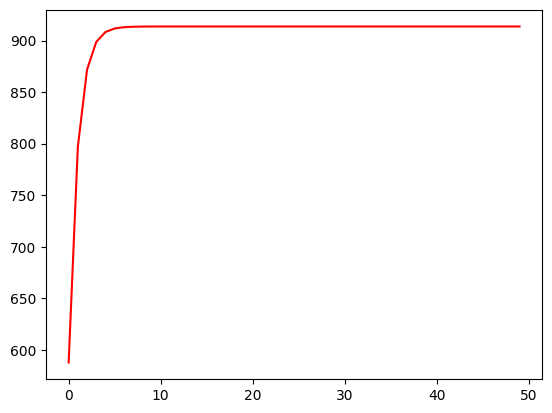

In [19]:
# 에포크가 50회 실행 시 어떻게 바뀌어가는지 확인 -> hist_a, hist_b, hist_sqerr

a = 1.0
b = 1.0

hist_a = []
hist_b = []
hist_sqerr = []

for e in range(50) :
  for i in range(bmi.shape[0]) :
    a, b = back_prop(bmi[i], target[i], a, b)
  hist_a.append(a)
  hist_b.append(b)
  t = np.array(target)
  m = np.array(my_line(bmi, a, b))
  # hist_sqerr.append(sqerr(target, my_line(bmi,a,b)))
  hist_sqerr.append(sqerr(t, m))
  
print(a, b)

_, axe = plt.subplots()

axe.plot(hist_a, color='r')
# axe.plot(hist_b, color='g')
# axe.plot(hist_sqerr, color='b')

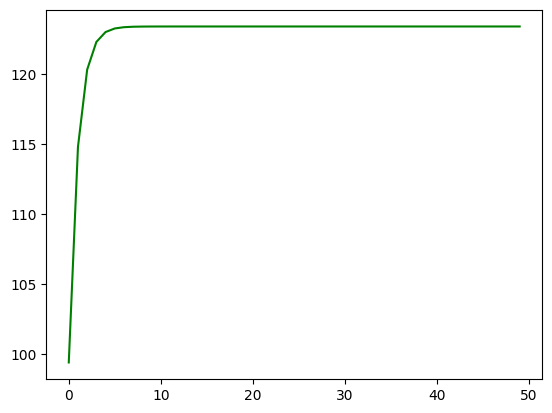

In [20]:
_, axe = plt.subplots()

# axe.plot(hist_a, color='r')
axe.plot(hist_b, color='g')
# axe.plot(hist_sqerr, color='b')

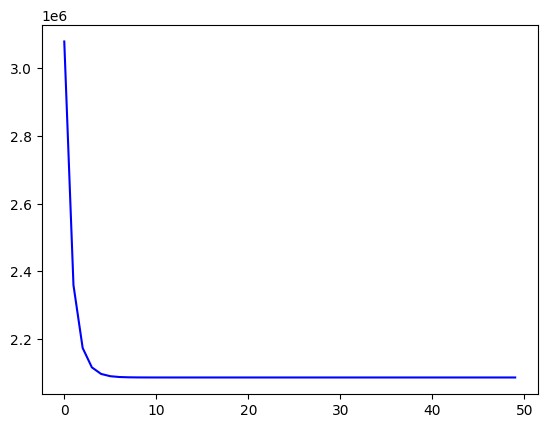

In [21]:
_, axe = plt.subplots()

# axe.plot(hist_a, color='r')
# axe.plot(hist_b, color='g')
axe.plot(hist_sqerr, color='b')

# sqerr 값을 줄여나가는 것이 좋은 예측 모델을 만드는 방법이다!
# gradient descent algorithm (경사 하강 알고리즘)


# Batch Gradient Descent (BGD)
# loss function을 입력 데이터 x가 아닌 가중치에 대해 편미분하는 것으로 입력 데이터 x의 개수와는 무관
# 전체 데이터에 대해 업데이트가 한번에 이루어지므로 SGD보다 업데이트 횟수가 적다
# 전체 데이터에 대해 error gradient를 계산하므로 수렴이 안정적으로 진행
# 병렬 처리에 용이
# 단점 : 한 스텝에 모든 데이터셋을 처리하므로 학습이 오래 걸림, 전체 데이터에 대한 error를 처리해야 하므로 메모리 소비가 큼, local optimal 상태가 되면 빠져나오기 힘듦


# Stochastic Gradient Descent(SGD)
# 추출된 하나의 데이터에 대해 error gradient를 계산한 후 gradient descent 알고리즘 적용
# SGD는 입력 데이터 한 개만을 사용하므로 한 개의 데이터를 벡터로 표현하여 특정 레이어 층에 입력하는 것으로 이해 (벡터*행렬 연산)
# local optimal에 빠질 리스크가 적다
# step에 걸리는 시간이 짧아 수렴 속도가 상대적으로 빠른다
# 단점 : global optimal을 찾지 못할 수 있음, 데이터를 한 개씩 처리하므로 GPU 성능을 전부 활용하진 못함

